In [136]:
# -*- coding: utf-8 -*-
%matplotlib inline

import re
import pandas as pd
import numpy as np
import math
import matplotlib as mplstyle
import matplotlib.pyplot as plt
import locale
import arrow
from locale import atof
from dateutil import parser
from datetime import datetime

plt.style.use('fivethirtyeight')

In [137]:
# Import default-only data

# FY 2014, FY 2013, and FY 2012 official cohort default rates published 
# for schools participating in the Title IV student financial assistance programs.
default_all_schools = pd.read_csv('data/_default/peps300_all.csv') 

# Schools subject to loss of Direct Loan Program and/or Pell Grant Program eligibility due
# to FY 2014, FY 2013, and FY 2012 official cohort default rates of 30% or greater. 
default_30plus = pd.read_csv('data/_default/peps300_all.csv')

# Schools subject to loss of Direct Loan Program due to FY 2014 official cohort 
# default rates greater than 40%.
default_40plus = pd.read_csv('data/_default/peps304_30+default.csv')

# FY 2014 official cohort default rates published for schools that may be eligible 
# for Benefits due to cohort default rates 5.0% and below.
default_5below = pd.read_csv('data/_default/peps751_5-default.csv')

# FY 2014, FY 2013, and FY 2012 official cohort default rates published for schools 
# that may be eligible for Benefits due to cohort default rates 15.0% and below for 3 years.
default_15below = pd.read_csv('data/_default/peps753_15-default.csv')

In [138]:
# Functions
def replaceYear(string):
    lastChar = string.strip()[-1]
    if (lastChar == '1'):
        string = re.sub(r'1', '2014', string)
    elif (lastChar == '2'):
        string = re.sub(r'2', '2013', string)
    elif (lastChar == '3'):
        string = re.sub(r'3', '2012', string)
    return string
    
def classify(string):
    string = re.sub(r'\(|\)', '', string)
    classified = string.lower().strip().replace(' ','-')
    return classified

def find_share(num,total):
    return round((num / total)*100, 2)

def removeSpecChars(string):
    string = string.replace('$','')
    string = string.replace(',','')
    num = float(string)
    return num

In [139]:
default_all_schools.rename(columns=lambda c: replaceYear(c), inplace=True)
default_all_schools.rename(columns=lambda c: classify(c), inplace=True)
default_all_schools

,opeid,name,address,city,state,state-desc,zip-code,zip-ext,prog length,school type,...,year-2013,dual num-2013,dual denom-2013,drate-2013,prate-2013,year-2012,dual num-2012,dual denom-2012,drate-2012,prate-2012
0,1002,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY ...,4900 MERIDIAN STREET ...,NORMAL,AL,ALABAMA ...,35762,1357,8,1,...,2013,300,1812,16.5,A,2012,326,1895,17.2,A
1,1003,FAULKNER UNIVERSITY ...,5345 ATLANTA HIGHWAY ...,MONTGOMERY,AL,ALABAMA ...,36109,3398,8,2,...,2013,143,1491,9.5,A,2012,143,1417,10.0,A
2,1004,UNIVERSITY OF MONTEVALLO ...,PALMER CIRCLE ...,MONTEVALLO,AL,ALABAMA ...,35115,6000,8,1,...,2013,57,744,7.6,A,2012,83,805,10.3,A
3,1005,ALABAMA STATE UNIVERSITY ...,915 SOUTH JACKSON STREET ...,MONTGOMERY,AL,ALABAMA ...,36104,5714,8,1,...,2013,367,2196,16.7,P,2012,334,2137,15.6,P
4,1007,CENTRAL ALABAMA COMMUNITY COLLEGE ...,1675 CHEROKEE ROAD ...,ALEXANDER CITY,AL,ALABAMA ...,35010,0000,5,1,...,2013,146,659,22.1,P,2012,144,656,21.9,P
5,1008,ATHENS STATE UNIVERSITY ...,300 NORTH BEATY STREET ...,ATHENS,AL,ALABAMA ...,35611,1999,8,1,...,2013,51,959,5.3,A,2012,80,929,8.6,A
6,1009,AUBURN UNIVERSITY ...,107 SAMFORD HALL ...,AUBURN,AL,ALABAMA ...,36849,5113,8,1,...,2013,160,3727,4.2,P,2012,170,3772,4.5,P
7,1012,BIRMINGHAM-SOUTHERN COLLEGE ...,900 ARKADELPHIA ROAD ...,BIRMINGHAM,AL,ALABAMA ...,35254,0002,6,2,...,2013,8,271,2.9,A,2012,12,267,4.4,A
8,1013,CALHOUN COMMUNITY COLLEGE ...,6250 HIGHWAY 31 NORTH ...,TANNER,AL,ALABAMA ...,35671,0000,5,1,...,2013,357,2107,16.9,P,2012,325,1770,18.3,P
9,1015,ENTERPRISE STATE COMMUNITY COLLEGE ...,600 PLAZA DRIVE ...,ENTERPRISE,AL,ALABAMA ...,36331,1300,5,1,...,2013,113,554,20.3,A,2012,116,499,23.2,A


In [140]:
list(default_all_schools)

['opeid',
 'name',
 'address',
 'city',
 'state',
 'state-desc',
 'zip-code',
 'zip-ext',
 'prog\nlength',
 'school\ntype',
 'year-2014',
 'dual\nnum-2014',
 'dual\ndenom-2014',
 'drate-2014',
 'prate-2014',
 'ethnic-code',
 'program',
 'cong-dis',
 'region',
 'year-2013',
 'dual\nnum-2013',
 'dual\ndenom-2013',
 'drate-2013',
 'prate-2013',
 'year-2012',
 'dual\nnum-2012',
 'dual\ndenom-2012',
 'drate-2012',
 'prate-2012']

In [141]:
# Create dataframes for different school types
# by school type
public_schools = default_all_schools[default_all_schools['school\ntype'] == 1]
privatenp_schools = default_all_schools[default_all_schools['school\ntype'] == 2]
proprietary_schools = default_all_schools[default_all_schools['school\ntype'] == 3]

# by ethnic school type
nativeamer_schools = default_all_schools[default_all_schools['ethnic-code'] == 1]
hbcu_schools = default_all_schools[default_all_schools['ethnic-code'] == 2]
hispanic_schools = default_all_schools[default_all_schools['ethnic-code'] == 3]

In [142]:
list(default_all_schools)

['opeid',
 'name',
 'address',
 'city',
 'state',
 'state-desc',
 'zip-code',
 'zip-ext',
 'prog\nlength',
 'school\ntype',
 'year-2014',
 'dual\nnum-2014',
 'dual\ndenom-2014',
 'drate-2014',
 'prate-2014',
 'ethnic-code',
 'program',
 'cong-dis',
 'region',
 'year-2013',
 'dual\nnum-2013',
 'dual\ndenom-2013',
 'drate-2013',
 'prate-2013',
 'year-2012',
 'dual\nnum-2012',
 'dual\ndenom-2012',
 'drate-2012',
 'prate-2012']

In [143]:
default_cond = default_all_schools.drop(['address','city','state-desc','zip-code','zip-ext','cong-dis','region','year-2014','year-2013','year-2012'],axis=1)

### By ethnicity code

In [144]:
# hbcu average default rate
print('hbcu average 2014 default rate: %s' % default_cond[default_cond['ethnic-code'] == 2]['dual\nnum-2014'].mean())
print('hbcu average 2013 default rate: %s' % default_cond[default_cond['ethnic-code'] == 2]['dual\nnum-2013'].mean())
print('hbcu average 2012 default rate: %s' % default_cond[default_cond['ethnic-code'] == 2]['dual\nnum-2012'].mean())

# native amer average default rate
print('native amer 2014 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 1]['dual\nnum-2014'].mean())
print('native amer 2013 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 1]['dual\nnum-2013'].mean())
print('native amer 2012 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 1]['dual\nnum-2012'].mean())

# hispanic average default rate
print('hispanic 2014 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 3]['dual\nnum-2014'].mean())
print('hispanic 2013 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 3]['dual\nnum-2013'].mean())
print('hispanic 2012 average default rate: %s' % default_cond[default_cond['ethnic-code'] == 3]['dual\nnum-2012'].mean())

# pwi default rate
print('pwi average 2014 default rate: %s' % default_cond[default_cond['ethnic-code'] == 5]['dual\nnum-2014'].mean())
print('pwi average 2013 default rate: %s' % default_cond[default_cond['ethnic-code'] == 5]['dual\nnum-2013'].mean())
print('pwi average 2012 default rate: %s' % default_cond[default_cond['ethnic-code'] == 5]['dual\nnum-2012'].mean())

print('\ntrend: hispanic default rate avg steadily rising')

hbcu average 2014 default rate: 169.595744681
hbcu average 2013 default rate: 174.031914894
hbcu average 2012 default rate: 179.382978723
native amer 2014 average default rate: 47.0
native amer 2013 average default rate: 63.0
native amer 2012 average default rate: 58.5
hispanic 2014 average default rate: 196.692307692
hispanic 2013 average default rate: 190.111888112
hispanic 2012 average default rate: 188.972027972
pwi average 2014 default rate: 121.034444196
pwi average 2013 default rate: 117.460299709
pwi average 2012 default rate: 118.750167748

trend: hispanic default rate avg steadily rising


In [164]:
# default_cond[default_cond['ethnic-code'] == 3]

### Highest (and lowest) number of defaulters per year
The University of Pheonix has the highest number of defaulters each year.

In [145]:
default_cond['dual\nnum-2014'].max() # 20528
print('University of Phoenix has the highest amount of defaulters in 2014 with %s defaulters' % default_cond['dual\nnum-2014'].max())
default_cond[default_cond['dual\nnum-2014'] == 20528]

University of Phoenix has the highest amount of defaulters in 2014 with 20528 defaulters


,opeid,name,state,prog length,school type,dual num-2014,dual denom-2014,drate-2014,prate-2014,ethnic-code,program,dual num-2013,dual denom-2013,drate-2013,prate-2013,dual num-2012,dual denom-2012,drate-2012,prate-2012
3049,20988,UNIVERSITY OF PHOENIX ...,AZ,8,3,20528,159144,12.8,A,5,D,26004,194107,13.3,A,27288,201163,13.5,A


In [146]:
default_cond['dual\nnum-2013'].max() # 26004
print('University of Phoenix has the highest amount of defaulters in 2013 with %s defaulters' % default_cond['dual\nnum-2013'].max())
default_cond[default_cond['dual\nnum-2013'] == 26004]

University of Phoenix has the highest amount of defaulters in 2013 with 26004 defaulters


,opeid,name,state,prog length,school type,dual num-2014,dual denom-2014,drate-2014,prate-2014,ethnic-code,program,dual num-2013,dual denom-2013,drate-2013,prate-2013,dual num-2012,dual denom-2012,drate-2012,prate-2012
3049,20988,UNIVERSITY OF PHOENIX ...,AZ,8,3,20528,159144,12.8,A,5,D,26004,194107,13.3,A,27288,201163,13.5,A


In [147]:
default_cond['dual\nnum-2012'].max() # 27288
print('University of Phoenix has the highest amount of defaulters in 2012 with %s defaulters' % default_cond['dual\nnum-2012'].max())
default_cond[default_cond['dual\nnum-2012'] == 27288]

University of Phoenix has the highest amount of defaulters in 2012 with 27288 defaulters


,opeid,name,state,prog length,school type,dual num-2014,dual denom-2014,drate-2014,prate-2014,ethnic-code,program,dual num-2013,dual denom-2013,drate-2013,prate-2013,dual num-2012,dual denom-2012,drate-2012,prate-2012
3049,20988,UNIVERSITY OF PHOENIX ...,AZ,8,3,20528,159144,12.8,A,5,D,26004,194107,13.3,A,27288,201163,13.5,A


In [148]:
# default_cond[default_cond['dual\nnum-2014'] == 0].count() # 114
# default_cond[default_cond['dual\nnum-2013'] == 0].count() # 151
# default_cond[default_cond['dual\nnum-2012'] == 0].count() # 223

print('the number of schools with no defaulters has been going down from 223 in 2012 to 114 in 2014')

the number of schools with no defaulters has been going down from 223 in 2012 to 114 in 2014


### By school type

In [167]:
# public average default rate
print('public average 2014 default rate: %s' % default_cond[default_cond['school\ntype'] == 1]['dual\nnum-2014'].mean())
print('public average 2013 default rate: %s' % default_cond[default_cond['school\ntype'] == 1]['dual\nnum-2013'].mean())
print('public average 2012 default rate: %s' % default_cond[default_cond['school\ntype'] == 1]['dual\nnum-2012'].mean())

# private average default rate
print('private average 2014 default rate: %s' % default_cond[default_cond['school\ntype'] == 2]['dual\nnum-2014'].mean())
print('private average 2013 default rate: %s' % default_cond[default_cond['school\ntype'] == 2]['dual\nnum-2013'].mean())
print('private average 2012 default rate: %s' % default_cond[default_cond['school\ntype'] == 2]['dual\nnum-2012'].mean())

# proprietary average default rate
print('proprietary average 2014 default rate: %s' % default_cond[default_cond['school\ntype'] == 3]['dual\nnum-2014'].mean())
print('proprietary average 2013 default rate: %s' % default_cond[default_cond['school\ntype'] == 3]['dual\nnum-2013'].mean())
print('proprietary average 2012 default rate: %s' % default_cond[default_cond['school\ntype'] == 3]['dual\nnum-2012'].mean())

# print('\ntrend: hispanic default rate avg steadily rising')

public average 2014 default rate: 195.132399745
public average 2013 default rate: 198.366008912
public average 2012 default rate: 195.401654997
private average 2014 default rate: 77.4576844956
private average 2013 default rate: 60.5226811104
private average 2012 default rate: 56.7068381855
proprietary average 2014 default rate: 109.085163007
proprietary average 2013 default rate: 111.424484365
proprietary average 2012 default rate: 122.337325349


In [150]:
# school types: (1) public, (2) private np, (3) proprietary
default_cond.groupby('school\ntype').mean().reset_index().drop(['opeid','prog\nlength','ethnic-code'], axis=1).sort_values('dual\nnum-2014',ascending=False)


,school type,dual num-2014,dual denom-2014,drate-2014,dual num-2013,dual denom-2013,drate-2013,dual num-2012,dual denom-2012,drate-2012
0,1,195.132400,1730.290261,13.446340,198.366009,1749.326544,13.368746,195.401655,1668.945258,13.751560
2,3,109.085163,743.896208,12.894212,111.424484,787.467066,12.622222,122.337325,819.266800,12.839521
1,2,77.457684,942.330399,6.626743,60.522681,820.888287,6.332498,56.706838,785.668246,6.442925
4,6,6.677419,85.000000,6.264516,6.419355,82.387097,6.548387,6.387097,79.709677,6.674194
5,7,4.600000,552.600000,0.620000,3.600000,586.800000,0.660000,2.800000,588.800000,0.620000
3,5,2.072000,64.176000,3.760800,1.992000,60.920000,3.655200,1.872000,59.688000,3.560800


### By state

In [151]:
avgDefaulters_byState = default_cond.groupby('state').mean().reset_index().drop(['opeid','prog\nlength','ethnic-code'], axis=1)
avgDefaulters_byState

,state,school type,dual num-2014,dual denom-2014,drate-2014,dual num-2013,dual denom-2013,drate-2013,dual num-2012,dual denom-2012,drate-2012
0,AK,1.571429,100.000000,775.857143,13.971429,90.142857,770.000000,12.385714,98.714286,764.000000,14.057143
1,AL,1.709091,192.800000,1461.218182,14.283636,178.818182,1461.963636,13.352727,168.709091,1418.200000,12.221818
2,AR,1.790323,89.290323,758.645161,13.727419,113.225806,860.467742,15.022581,114.241935,831.693548,15.201613
3,AZ,2.318182,631.030303,4612.151515,14.604545,734.924242,5258.803030,13.987879,764.136364,5346.636364,14.628788
4,CA,2.105495,73.019780,817.074725,10.631648,79.986813,859.883516,10.340440,87.657143,848.090110,10.784176
5,CO,2.135802,138.320988,1240.111111,9.896296,141.395062,1266.382716,10.286420,160.246914,1382.382716,9.860494
6,CT,2.055556,102.666667,1066.833333,8.751852,74.796296,895.796296,8.957407,76.462963,886.500000,7.657407
7,DC,2.235294,271.176471,2701.411765,10.217647,228.352941,2678.058824,9.323529,239.176471,2718.764706,9.423529
8,DE,2.214286,80.428571,853.500000,11.085714,85.428571,854.428571,12.364286,63.357143,727.857143,11.042857
9,FC,5.254658,3.037267,83.354037,4.145342,2.894410,81.385093,4.119255,2.770186,79.975155,4.068944


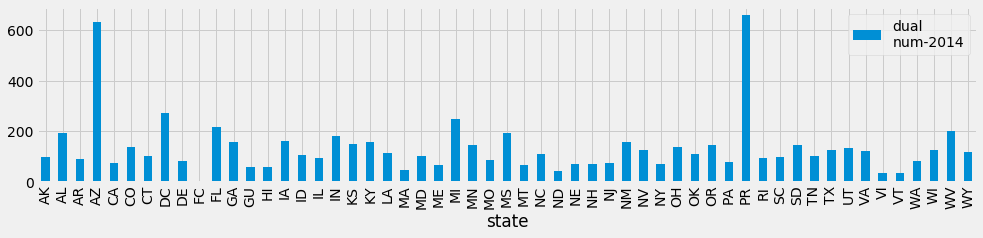

In [152]:
avgDefaulters_byState.plot(kind='bar',x='state',y='dual\nnum-2014', figsize=[15,3])
# .sort_values('dual\nnum-2014',ascending=False)

In [153]:
default_30plus.rename(columns=lambda c: replaceYear(c), inplace=True)
default_30plus.rename(columns=lambda c: classify(c), inplace=True)
default_30plus

,opeid,name,address,city,state,state-desc,zip-code,zip-ext,prog length,school type,...,year-2013,dual num-2013,dual denom-2013,drate-2013,prate-2013,year-2012,dual num-2012,dual denom-2012,drate-2012,prate-2012
0,1002,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY ...,4900 MERIDIAN STREET ...,NORMAL,AL,ALABAMA ...,35762,1357,8,1,...,2013,300,1812,16.5,A,2012,326,1895,17.2,A
1,1003,FAULKNER UNIVERSITY ...,5345 ATLANTA HIGHWAY ...,MONTGOMERY,AL,ALABAMA ...,36109,3398,8,2,...,2013,143,1491,9.5,A,2012,143,1417,10.0,A
2,1004,UNIVERSITY OF MONTEVALLO ...,PALMER CIRCLE ...,MONTEVALLO,AL,ALABAMA ...,35115,6000,8,1,...,2013,57,744,7.6,A,2012,83,805,10.3,A
3,1005,ALABAMA STATE UNIVERSITY ...,915 SOUTH JACKSON STREET ...,MONTGOMERY,AL,ALABAMA ...,36104,5714,8,1,...,2013,367,2196,16.7,P,2012,334,2137,15.6,P
4,1007,CENTRAL ALABAMA COMMUNITY COLLEGE ...,1675 CHEROKEE ROAD ...,ALEXANDER CITY,AL,ALABAMA ...,35010,0000,5,1,...,2013,146,659,22.1,P,2012,144,656,21.9,P
5,1008,ATHENS STATE UNIVERSITY ...,300 NORTH BEATY STREET ...,ATHENS,AL,ALABAMA ...,35611,1999,8,1,...,2013,51,959,5.3,A,2012,80,929,8.6,A
6,1009,AUBURN UNIVERSITY ...,107 SAMFORD HALL ...,AUBURN,AL,ALABAMA ...,36849,5113,8,1,...,2013,160,3727,4.2,P,2012,170,3772,4.5,P
7,1012,BIRMINGHAM-SOUTHERN COLLEGE ...,900 ARKADELPHIA ROAD ...,BIRMINGHAM,AL,ALABAMA ...,35254,0002,6,2,...,2013,8,271,2.9,A,2012,12,267,4.4,A
8,1013,CALHOUN COMMUNITY COLLEGE ...,6250 HIGHWAY 31 NORTH ...,TANNER,AL,ALABAMA ...,35671,0000,5,1,...,2013,357,2107,16.9,P,2012,325,1770,18.3,P
9,1015,ENTERPRISE STATE COMMUNITY COLLEGE ...,600 PLAZA DRIVE ...,ENTERPRISE,AL,ALABAMA ...,36331,1300,5,1,...,2013,113,554,20.3,A,2012,116,499,23.2,A


In [154]:
default_40plus.rename(columns=lambda c: replaceYear(c), inplace=True)
default_40plus.rename(columns=lambda c: classify(c), inplace=True)
default_40plus = default_40plus[:6]

In [156]:
default_40plus

,opeid,name,address,city,state,state-desc,zip-code,zip-ext,prog length,school type,...,dual num-2013,dual denom-2013,drate-2013,prate-2013,year-2012,dual num-2012,dual denom-2012,drate-2012,prate-2012,dd
0,1998.0,SOUTHEAST KENTUCKY COMMUNITY AND TECHNICAL COL...,700 COLLEGE ROAD ...,CUMBERLAND,KY,KENTUCKY ...,40823.0,1099.0,5.0,1.0,...,202.0,635.0,31.8,P,2012.0,146.0,451.0,32.3,P,NaN
1,20568.0,DAYMAR COLLEGE ...,3879 RHODES AVENUE ...,NEW BOSTON,OH,OHIO ...,45662.0,4900.0,5.0,3.0,...,191.0,561.0,34.0,A,2012.0,275.0,816.0,33.7,A,NaN
2,22429.0,UNITED TRIBES TECHNICAL COLLEGE ...,3315 UNIVERSITY DRIVE ...,BISMARCK,ND,NORTH DAKOTA ...,58504.0,7596.0,6.0,2.0,...,51.0,125.0,40.8,A,2012.0,62.0,139.0,44.6,A,NaN
3,36803.0,JAY'S TECHNICAL INSTITUTE ...,11910 FONDREN MEADOW DR. ...,HOUSTON,TX,TEXAS ...,77071.0,3509.0,3.0,3.0,...,48.0,103.0,46.6,A,2012.0,35.0,67.0,52.2,A,NaN
4,38763.0,CULPEPER COSMETOLOGY TRAINING CENTER ...,311 SOUTH EAST STREET #120 ...,CULPEPER,VA,VIRGINIA ...,22701.0,3105.0,3.0,1.0,...,15.0,42.0,35.7,B,2012.0,12.0,32.0,37.5,B,NaN
5,41669.0,COSMETIC ARTS INSTITUTE ...,1789 HAMPTON STREET ...,WALTERBORO,SC,SOUTH CAROLINA ...,29488.0,4216.0,3.0,3.0,...,11.0,34.0,32.3,A,2012.0,14.0,31.0,45.1,B,NaN
